<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [ ]:
df=pd.read_csv('/content/heart_study.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [ ]:
df.rename(columns={'male':'sex_male'},inplace=True)

###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [ ]:
df.isnull().sum()/len(df)

sex_male           0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

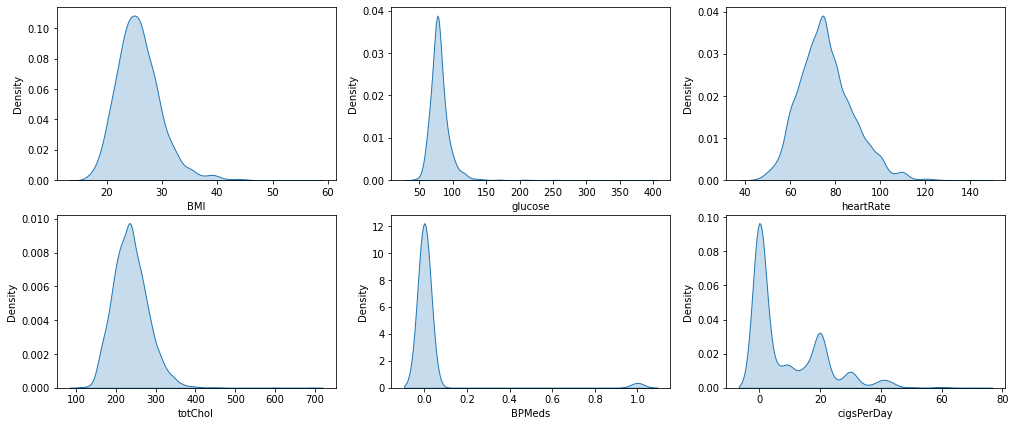

In [ ]:
plt.figure(figsize=(17,7))
plt.subplot(2,3,1)
sns.kdeplot(df['BMI'], shade=True)
plt.subplot(2,3,2)
sns.kdeplot(df['glucose'], shade=True)
plt.subplot(2,3,3)
sns.kdeplot(df['heartRate'], shade=True)
plt.subplot(2,3,4)
sns.kdeplot(df['totChol'], shade=True)
plt.subplot(2,3,5)
sns.kdeplot(df['BPMeds'], shade=True)
plt.subplot(2,3,6)
sns.kdeplot(df['cigsPerDay'], shade=True)

## The above plots show the distribution of the variables. In case the variables are normally distributed then the null values can be replaced either of by mean, median or mode.

In [ ]:
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

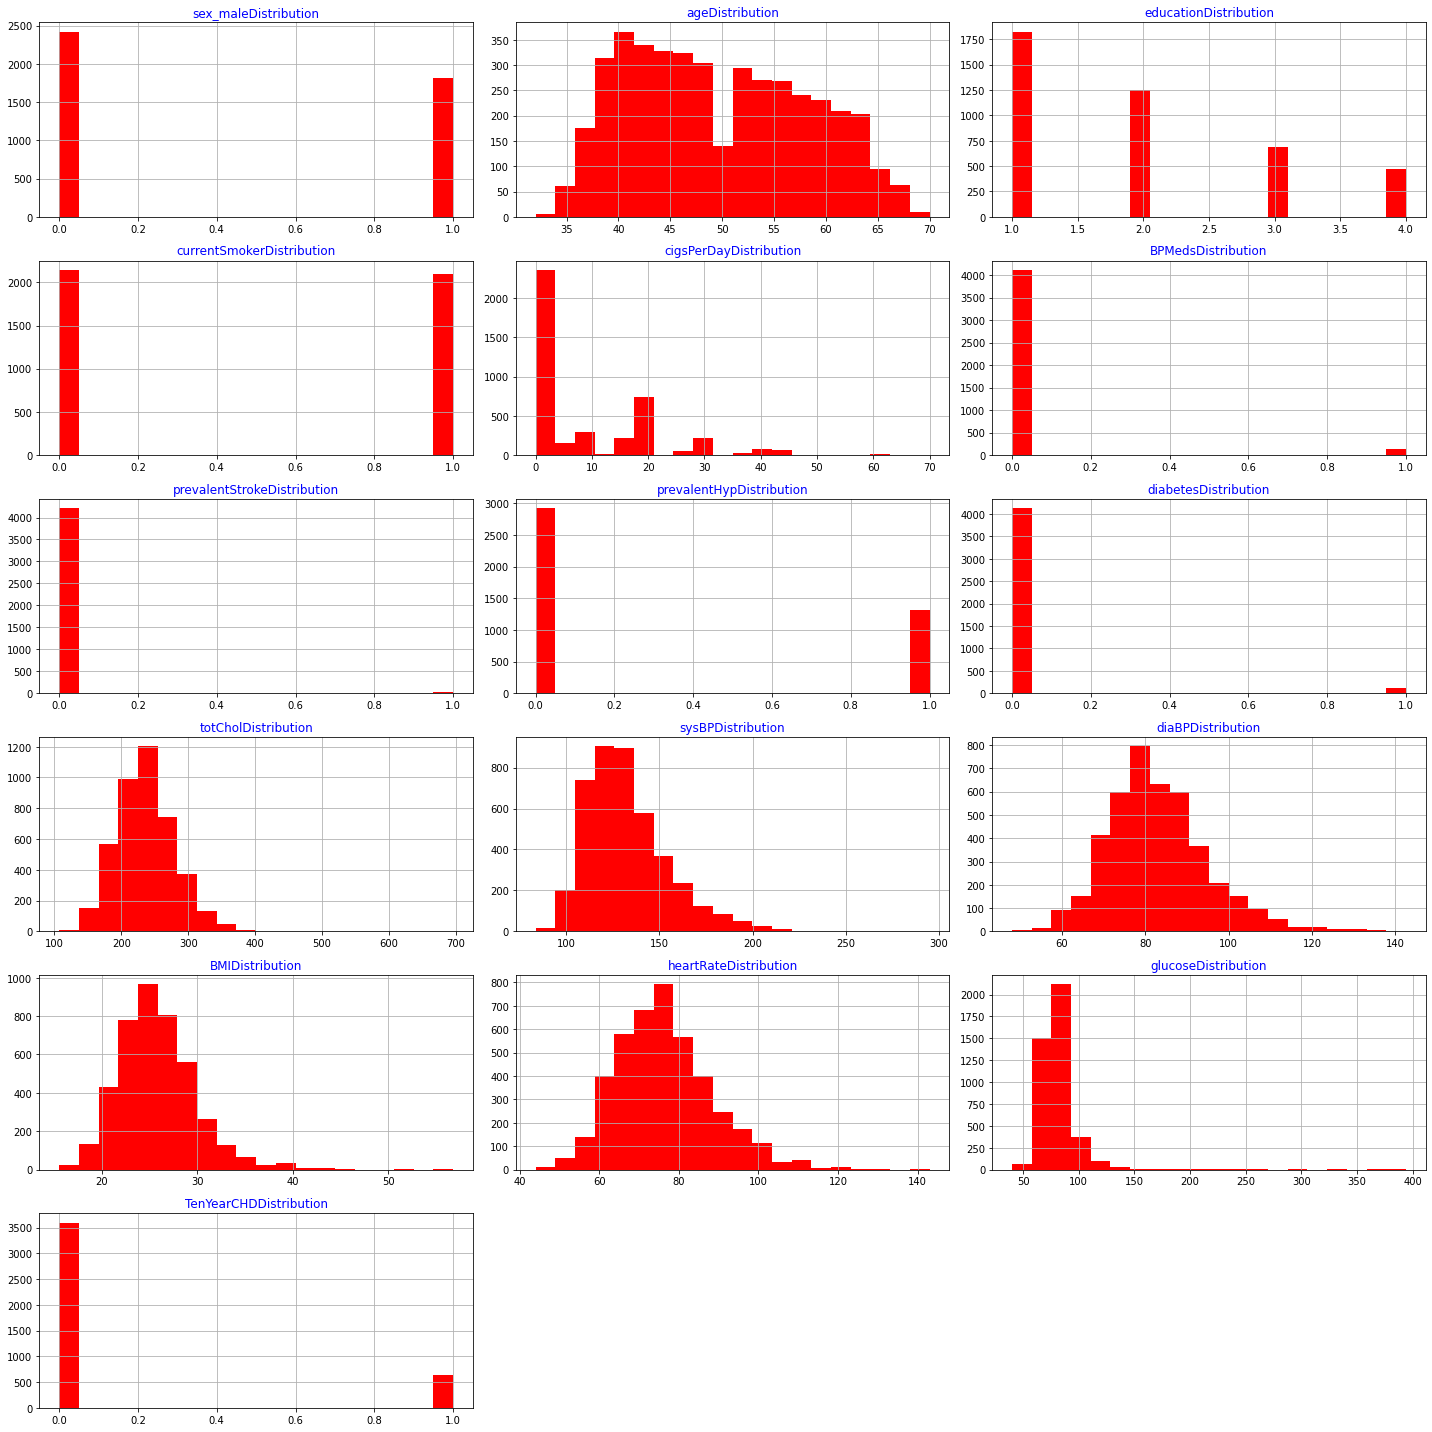

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

#### The columns that have discrete values in the form of 0s & 1s have only 2 bars in the histogram.Other columns with continuous numerical values have multiple bars, in this case histogram shows the nature of distribution(Normal, left-skewed, right-skewed) of the data in that particular column.

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


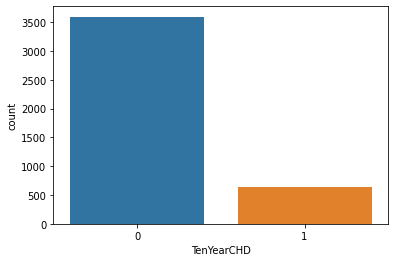

In [ ]:
sns.countplot(df['TenYearCHD'])

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression. 

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:15]
y=df.iloc[:,15]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
classifier.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8502358490566038

In [ ]:
confusion_matrix(y_test,y_pred)

array([[718,   2],
       [125,   3]])

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link. 

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1116
Time:                        11:10:33   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.553e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1333      0.665    -12.231      0.000      -9.437      -6.830
sex_male            0.5029      0.100      5.011      0.000       0.306       0.700
age                 0.0622      0.006     10.005      0.000       0.050       0.074
education          -0.0114      0.046     -0.249      0.803      -0.101       0.078
currentSmoker       0.0145      0.143      0.101      0.919      -0.265       0.294
cigsPerDay          0.0214      0.006      3.790      0.000       0.010       0.032
BPMeds              0.2434      0.220      1.105      0.269      -0.188       0.675
prevalentStroke     0.9621      0.442      2.178      0.029       0.097       1.828
prevalentHyp        0.2301      0.128      1.791      0.073      -0.022       0.482
diabetes            0.1874      0.294      0.637      0.524      -0.389       0.764
totChol             0.0018      0.001      1.785      0.074      -0.000       0.004
sysBP               0.0141      0.004      3.989      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.486      0.627      -0.015       0.009
BMI                 0.0035      0.012      0.300      0.764      -0.020       0.027
heartRate          -0.0015      0.004     -0.381      0.703      -0.009       0.006
glucose             0.0067      0.002      3.135      0.002       0.003       0.011
===================================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1091
Time:                        11:10:58   Log-Likelihood:                -1609.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 5.270e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4642      0.389    -21.747      0.000      -9.227      -7.701
sex_male            0.4828      0.097      4.966      0.000       0.292       0.673
age                 0.0648      0.006     10.937      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.630      0.000       0.014       0.029
prevalentStroke     1.0447      0.436      2.395      0.017       0.190       1.900
sysBP               0.0171      0.002      8.524      0.000       0.013       0.021
glucose             0.0076      0.002      4.662      0.000       0.004       0.011
===================================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000452    0.000211   0.000
sex_male             1.339436       1.960696    1.620564   0.000
age                  1.054621       1.079399    1.066938   0.000
cigsPerDay           1.014207       1.029606    1.021877   0.000
prevalentStroke      1.208851       6.684146    2.842559   0.017
sysBP                1.013223       1.021203    1.017205   0.000
glucose              1.004410       1.010843    1.007622   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [ ]:
df1=df.loc[:,['sex_male','age','cigsPerDay','prevalentStroke','sysBP','glucose','TenYearCHD']]
x=df1.iloc[:,0:6]
y=df1.iloc[:,6]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=10)
classifier=LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
classifier.score(x_test,y_test)

0.8542857142857143

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1181,    5],
       [ 199,   15]])

### Recall is more important in terms of heart disease prediction as it won't miss out any possible case of heart disease. In case a patient is predicted to have a heart disease, a diagnostic test can be done to confirm the result but in case a patient having a heart disease goes unnoticed then it can fatal.

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [ ]:
accuracy= (1181+15)/(1181+5+199+15)
precision= 1181/(1181+5)
recall=1181/(1181+199)
print(f"Accuracy is {accuracy}")
print(f"Precision is {precision}")
print(f"Recall is {recall}")

Accuracy is 0.8542857142857143
Precision is 0.9957841483979764
Recall is 0.8557971014492753
